<a href="https://colab.research.google.com/github/karolcastro/Python-Hands-On/blob/master/C%C3%B3pia_de_2_Intro_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Processamento de Linguagem Natural usando Python

# Antes de começar!

### Dicas!

Para instalar novos pacotes:

 - pip install nome_do_pacote

OU 

 - conda install nome_do_pacote 


### Pacotes necessarios: 
    - conda install -c conda-forge wordcloud 
    - pip install nltk
    - pip install pandas
    - pip install spacy
    

## Atenção!

Os nomes das lojas foram ocultados para mantermos a segurança da loja.

A empresa foi substituído por códigos para representar cada uma individualmente.

Dentro do corpo da reclamação, o nome da loja foi substituído  por "LOJA"

Nomes e emails também foram removidos.

# Atenção!

Antes de começarmos é necessario baixar a lista de stopwords, sentence tokenization e o corpus do NLTK

In [60]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('machado')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package machado to /root/nltk_data...


True

# 1. Exemplo -  Corpus

In [61]:
from nltk.corpus import machado

# Verificando o conjunto de textos contido no Corpus Machado
print(machado.fileids())

# Cada arquivo corresponde a uma das obras de Machado de Assis. 

['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt', 'contos/macn011.txt', 'contos/macn012.txt', 'contos/macn013.txt', 'contos/macn014.txt', 'contos/macn015.txt', 'contos/macn016.txt', 'contos/macn017.txt', 'contos/macn018.txt', 'contos/macn019.txt', 'contos/macn020.txt', 'contos/macn021.txt', 'contos/macn022.txt', 'contos/macn023.txt', 'contos/macn024.txt', 'contos/macn025.txt', 'contos/macn026.txt', 'contos/macn027.txt', 'contos/macn028.txt', 'contos/macn029.txt', 'contos/macn030.txt', 'contos/macn031.txt', 'contos/macn032.txt', 'contos/macn033.txt', 'contos/macn034.txt', 'contos/macn035.txt', 'contos/macn036.txt', 'contos/macn037.txt', 'contos/macn038.txt', 'contos/macn039.txt', 'contos/macn040.txt', 'contos/macn041.txt', 'contos/macn042.txt', 'contos/macn043.txt', 'contos/macn044.txt', 'contos/macn045.txt', 'contos/m

In [62]:
# Para acessar o texto como uma lista de 200 caracteres..
raw_machado_text = machado.raw('romance/marm05.txt') # explore outros arquivos
raw_machado_text[10000:10200]

', primou no\nEstado, e foi um dos amigos particulares do vice-rei Conde da Cunha.\n\nComo este apelido de Cubas lhe\ncheirasse excessivamente a tanoaria, alegava meu pai, bisneto de Damião, que o\ndito ape'

In [63]:
# Porem, a forma acima não é uma maneira muito útil de trabalhar com um texto. 
# Geralmente pensamos em um texto como uma sequência de palavras e pontuação, não em caracteres..
text1 = machado.words('romance/marm05.txt')
text1

['Romance', ',', 'Memórias', 'Póstumas', 'de', 'Brás', ...]

In [64]:
# Checando o tamanho do romance marm05.txt
print('Quantidade de palavras {}'.format(len(text1)))
# Checando o tamanho de palavras unicas do texto
print('Quantidade de palavras unicas {}'.format(len(set(text1))))

Quantidade de palavras 77098
Quantidade de palavras unicas 10848


In [0]:
# Sua vez: O que mais podemos fazer?
# Liste aqui suas ideia!

http://www.nltk.org/howto/portuguese_en.html

# Dados Reclame Aqui

## 1. Importando os Dados

In [0]:
## Para executar na sua maquina local, Descomente essa celula

# Importando Pandas
# import pandas as pd

# Vamos agora importar os dados que vamos trabalhar!
# reclamacoes = pd.read_csv('reclamacoes.csv', sep=';')

# print(reclamacoes.shape)

# reclamacoes.head()

In [96]:
## Para executar no Google Colab

from google.colab import files

uploaded = files.upload()

import io
data = io.BytesIO(uploaded['reclamacoes.csv'])    

import pandas as pd   
reclamacoes = pd.read_csv(data, sep=';')

reclamacoes.head()

Saving reclamacoes.csv to reclamacoes (3).csv


,empresa,data_reclamacao,local,titulo_reclamacao,corpo_reclamacao,tags,teve_resposta
0,Loja A,23/03/19 às 18h33,Guarulhos - SP,Mau Atendimento,Nunca mais compro nessa loja pelo fato de que ...,Calçados Esportivos,0
1,Loja A,23/03/19 às 18h20,Taubaté - SP,Produtos misturado na gondula e divergência na...,"Eu a LOJA comprar uma luva de musculação, na q...","Divergência de valores, Acessórios para Muscul...",0
2,Loja A,23/03/19 às 11h07,Franco da Rocha - SP,Informaçao errada do vendedor.,Estive na LOJA da Marginal Tiete no dia 15 de ...,"Produto errado, Raquetes e Tacos, Artigos Espo...",0
3,Loja A,23/03/19 às 10h57,Teresina - PI,Paguei por um produto fora do estoque,Comprei 3 produtos no dia 13.03 e recebi email...,Acessórios de Vestuário,1
4,Loja A,22/03/19 às 19h49,São Gonçalo do Pará - MG,entregaram meu pedido a outra pessoa falando q...,comprei um tenis esportivo e ao receber o avis...,Problemas na finalização da compra Tênis Calça...,0


In [76]:
# Verificando se tem dados faltantes
reclamacoes.isna().sum()

empresa              0
data_reclamacao      0
local                0
titulo_reclamacao    0
corpo_reclamacao     0
tags                 1
teve_resposta        0
data                 0
estado               0
dtype: int64

## 2.Pré-Processamento

### 2.1 Quebrando a coluna data_reclamacao em dia e hora

In [97]:
# Vamos separar as informações

print('Como era antes:')
print(reclamacoes['data_reclamacao'][:3])

# Separando...
reclamacoes['data'] = reclamacoes['data_reclamacao'].str.split('às',expand=True)[0]

print('\n')
print('Como ficou agora:')
print(reclamacoes['data'][:3])

Como era antes:
0     23/03/19 às 18h33
1     23/03/19 às 18h20
2     23/03/19 às 11h07
Name: data_reclamacao, dtype: object


Como ficou agora:
0     23/03/19 
1     23/03/19 
2     23/03/19 
Name: data, dtype: object


In [98]:
# Sua vez: Faça a mesma coisa para a informação hora

# Você consegue identificar algo que está faltando ao utilizar essa nossa técnica?
# Dica: Utilize reclamacoes.data[0]

print(reclamacoes['data_reclamacao'][:3])

# Separando...
reclamacoes['hora'] = reclamacoes['data_reclamacao'].str.split('às',expand=True)[1]

print('\n')
print('Como ficou agora:')
print(reclamacoes['hora'][:5])


0     23/03/19 às 18h33
1     23/03/19 às 18h20
2     23/03/19 às 11h07
Name: data_reclamacao, dtype: object


Como ficou agora:
0     18h33
1     18h20
2     11h07
3     10h57
4     19h49
Name: hora, dtype: object


In [0]:
# Como resolver o problema acima?
# Sua solução:
# Verifique se a sua solução funcionou:


In [80]:
reclamacoes.data[0]

' 23/03/19 '

In [99]:
reclamacoes['data'] = reclamacoes['data'].str.strip()
reclamacoes['hora'] = reclamacoes['hora'].str.strip()

reclamacoes.data[0]

'23/03/19'

### 2.2 Quebrando a coluna local em Cidade e Estado

In [100]:
# Sua vez: Faça a mesma coisa para que você fez acima para a variavel local e estado
# não se esqueça do problema que resolvemos acima!
# Vamos separar as informações

# Vamos separar as informações

print('Como era antes:')
print(reclamacoes['local'][:3])

# Separando...
reclamacoes['estado'] = reclamacoes['local'].str.split('-',expand=True)[1]

print('\n')
print('Como ficou agora:')
print(reclamacoes['estado'][:4])




Como era antes:
0          Guarulhos - SP
1            Taubaté - SP
2    Franco da Rocha - SP
Name: local, dtype: object


Como ficou agora:
0     SP
1     SP
2     SP
3     PI
Name: estado, dtype: object


In [101]:
print(reclamacoes['local'][:3])

# Separando...
reclamacoes['cidade'] = reclamacoes['local'].str.split('-',expand=True)[0]

print('\n')
print('Como ficou agora:')
print(reclamacoes['cidade'][:4])

0          Guarulhos - SP
1            Taubaté - SP
2    Franco da Rocha - SP
Name: local, dtype: object


Como ficou agora:
0          Guarulhos 
1            Taubaté 
2    Franco da Rocha 
3           Teresina 
Name: cidade, dtype: object


In [85]:
# Visualizando as alterações que fizemos
reclamacoes[['data_reclamacao', 'data', 'hora', 'local', 'cidade', 'estado']].head()

,data_reclamacao,data,hora,local,cidade,estado
0,23/03/19 às 18h33,23/03/19,18h33,Guarulhos - SP,Guarulhos,SP
1,23/03/19 às 18h20,23/03/19,18h20,Taubaté - SP,Taubaté,SP
2,23/03/19 às 11h07,23/03/19,11h07,Franco da Rocha - SP,Franco da Rocha,SP
3,23/03/19 às 10h57,23/03/19,10h57,Teresina - PI,Teresina,PI
4,22/03/19 às 19h49,22/03/19,19h49,São Gonçalo do Pará - MG,São Gonçalo do Pará,MG


### 2.3 Alterar tipo de colunas

In [86]:
# Verificando o tipo de dados 
reclamacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
empresa              28 non-null object
data_reclamacao      28 non-null object
local                28 non-null object
titulo_reclamacao    28 non-null object
corpo_reclamacao     28 non-null object
tags                 27 non-null object
teve_resposta        28 non-null int64
data                 28 non-null object
estado               28 non-null object
hora                 28 non-null object
cidade               28 non-null object
dtypes: int64(1), object(10)
memory usage: 2.5+ KB


In [105]:
# Colunas que são categoricas
reclamacoes['teve_resposta'] = reclamacoes['teve_resposta'].astype('category')

# Colunas que são datetime
reclamacoes['data'] = pd.to_datetime(reclamacoes['data'])

reclamacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
empresa                   28 non-null object
data_reclamacao           28 non-null object
local                     28 non-null object
titulo_reclamacao         28 non-null object
corpo_reclamacao          28 non-null object
tags                      27 non-null object
teve_resposta             28 non-null category
data                      28 non-null datetime64[ns]
hora                      28 non-null object
estado                    28 non-null object
cidade                    28 non-null object
corpo_reclamacao_lower    28 non-null object
dtypes: category(1), datetime64[ns](1), object(10)
memory usage: 2.6+ KB


### 2.4 LowerCase

In [106]:
print('Antes:')
print(reclamacoes['corpo_reclamacao'].head())

Antes:
0    Nunca mais compro nessa loja pelo fato de que ...
1    Eu a LOJA comprar uma luva de musculação, na q...
2    Estive na LOJA da Marginal Tiete no dia 15 de ...
3    Comprei 3 produtos no dia 13.03 e recebi email...
4    comprei um tenis esportivo e ao receber o avis...
Name: corpo_reclamacao, dtype: object


In [107]:
# Aplicando Lower Case
reclamacoes['corpo_reclamacao_lower'] = [str(token).lower() for token in reclamacoes['corpo_reclamacao']]

print('Depois:')
reclamacoes.corpo_reclamacao_lower.head()

Depois:


0    nunca mais compro nessa loja pelo fato de que ...
1    eu a loja comprar uma luva de musculação, na q...
2    estive na loja da marginal tiete no dia 15 de ...
3    comprei 3 produtos no dia 13.03 e recebi email...
4    comprei um tenis esportivo e ao receber o avis...
Name: corpo_reclamacao_lower, dtype: object

### 2.5 Tokenização

In [108]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Vamos dividir um exemplo texto em tokens/palavras:
tokens = word_tokenize('A história do NLP começou na década de 1950, com Alan Turing'.lower())

print(tokens)

print('\nQuantidade de Tokens: {}'.format(len(tokens)))

['a', 'história', 'do', 'nlp', 'começou', 'na', 'década', 'de', '1950', ',', 'com', 'alan', 'turing']

Quantidade de Tokens: 13


In [109]:
# Agora vamos dividir um exemplo texto em sentenças:
sentencas = sent_tokenize('O Processamento de Linguagem Natural (PLN) é a subárea da Inteligência Artificial (IA) que estuda a capacidade e as limitações de uma máquina em entender a linguagem dos seres humanos. O objetivo do PLN é fornecer aos computadores a capacidade de entender e compor textos. “Entender” um texto significa reconhecer o contexto, fazer análise sintática, semântica, léxica e morfológica, criar resumos, extrair informação, interpretar os sentidos, analisar sentimentos e até aprender conceitos com os textos processados.') 

# Visualizando cada sentença
print(sentencas[0])
print()
print(sentencas[1])
print()
print(sentencas[2])

print('\nQuantidade de Sentenças: {}'.format(len(sentencas)))

O Processamento de Linguagem Natural (PLN) é a subárea da Inteligência Artificial (IA) que estuda a capacidade e as limitações de uma máquina em entender a linguagem dos seres humanos.

O objetivo do PLN é fornecer aos computadores a capacidade de entender e compor textos.

“Entender” um texto significa reconhecer o contexto, fazer análise sintática, semântica, léxica e morfológica, criar resumos, extrair informação, interpretar os sentidos, analisar sentimentos e até aprender conceitos com os textos processados.

Quantidade de Sentenças: 3


In [110]:
reclamacoes.head()

,empresa,data_reclamacao,local,titulo_reclamacao,corpo_reclamacao,tags,teve_resposta,data,hora,estado,cidade,corpo_reclamacao_lower
0,Loja A,23/03/19 às 18h33,Guarulhos - SP,Mau Atendimento,Nunca mais compro nessa loja pelo fato de que ...,Calçados Esportivos,0,2019-03-23,18h33,SP,Guarulhos,nunca mais compro nessa loja pelo fato de que ...
1,Loja A,23/03/19 às 18h20,Taubaté - SP,Produtos misturado na gondula e divergência na...,"Eu a LOJA comprar uma luva de musculação, na q...","Divergência de valores, Acessórios para Muscul...",0,2019-03-23,18h20,SP,Taubaté,"eu a loja comprar uma luva de musculação, na q..."
2,Loja A,23/03/19 às 11h07,Franco da Rocha - SP,Informaçao errada do vendedor.,Estive na LOJA da Marginal Tiete no dia 15 de ...,"Produto errado, Raquetes e Tacos, Artigos Espo...",0,2019-03-23,11h07,SP,Franco da Rocha,estive na loja da marginal tiete no dia 15 de ...
3,Loja A,23/03/19 às 10h57,Teresina - PI,Paguei por um produto fora do estoque,Comprei 3 produtos no dia 13.03 e recebi email...,Acessórios de Vestuário,1,2019-03-23,10h57,PI,Teresina,comprei 3 produtos no dia 13.03 e recebi email...
4,Loja A,22/03/19 às 19h49,São Gonçalo do Pará - MG,entregaram meu pedido a outra pessoa falando q...,comprei um tenis esportivo e ao receber o avis...,Problemas na finalização da compra Tênis Calça...,0,2019-03-22,19h49,MG,São Gonçalo do Pará,comprei um tenis esportivo e ao receber o avis...


In [120]:
# Sua vez: Separe os nossos textos em tokens e coloque em uma nova coluna chamada corpo_reclamacao_tokens

from nltk.tokenize import word_tokenize, sent_tokenize

reclamacoes['corpo_reclamacao_tokens'] = [word_tokenize(token) for token in recamcoes['corpo_reclamacao_lower']



# # Vamos dividir um exemplo texto em tokens/palavras:

# print(tokens)

# print('\nQuantidade de Tokens: {}'.format(len(tokens)))

SyntaxError: ignored

In [0]:
# Como ficou nosso dataset até agora
reclamacoes.head()

### 2.6 Remoção das StopWords

In [121]:
from nltk.corpus import stopwords
from string import punctuation
import re # Regex

#  Regex para encontrar pontuações dentro do texto
other_punctuation_reg = r'(\.{2,}|-+|—+|\|+)'

other_punctuation_finds = []

# Percorre a lista de reclamções e identica as pontuações
for text in reclamacoes.corpo_reclamacao_lower:
    # encontra as pontuações
    p = re.search(other_punctuation_reg, text)
    if p:
        other_punctuation_finds.append(p.group())

# Gera lista com stopwords em Português  
portuguese_stopswords = set(stopwords.words('portuguese') + list(punctuation) + other_punctuation_finds)

# Adicionando outras palavras na nossa lista de StopWords
portuguese_stopswords.add('é')

portuguese_stopswords


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '..',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemo

O comando stopwords.words("portuguese") lista todas as stopwords em português; 

OU

Para visualizar a lista de StopWords:

C:\Users\SEU_USUARIO\AppData\Roaming\nltk_data\corpora\stopwords

In [122]:
# Verificando como era antes
print('Antes de remover as StopWords:')
reclamacoes.corpo_reclamacao_lower[0]

Antes de remover as StopWords:


'nunca mais compro nessa loja pelo fato de que tive o pior atendimento de toda minha vida 23-03-2019.\nestávamos experimentando algumas chuteiras na loja da marginal tiete, e meu filho (13 anos)encontrou uma bola de futebol ali no chão, e começou a brincar, várias crianças nessa loja brincam com bolas e acessórios, quando estávamos saindo, meu filho chutou a bola próximo a uns gols que estavam expostos ali no setor, e um funcionário chamou a atenção dele na frente de todos ali, não entendi o motivo, e questionei para meu filho o que tinha acontecido e ele me disse, e nisso o mesmo funcionário veio me falar que tinha falado pro meu filho pra ele não chutar a bola ali naquele espaço, sendo que o meu filho só tinha rolado a bola pra aquele canto pois estávamos indo embora, nisso minha esposa questionou se ele estava chamando a atenção do meu filho teria que chamar a atenção de todas as crianças que estavam brincando ali, ai pra minha surpresa ele disse que meu filho tinha chutado a bola n

In [123]:
# Exemplo - Removendo StopWords da primeira reclamação
palavras_sem_stopwords = [token for token in reclamacoes['corpo_reclamacao_tokens'][0] if token not in portuguese_stopswords]
palavras_sem_stopwords

['N',
 'u',
 'n',
 'c',
 ' ',
 'm',
 'i',
 's',
 ' ',
 'c',
 'm',
 'p',
 'r',
 ' ',
 'n',
 's',
 's',
 ' ',
 'l',
 'j',
 ' ',
 'p',
 'l',
 ' ',
 'f',
 't',
 ' ',
 'd',
 ' ',
 'q',
 'u',
 ' ',
 't',
 'i',
 'v',
 ' ',
 ' ',
 'p',
 'i',
 'r',
 ' ',
 't',
 'n',
 'd',
 'i',
 'm',
 'n',
 't',
 ' ',
 'd',
 ' ',
 't',
 'd',
 ' ',
 'm',
 'i',
 'n',
 'h',
 ' ',
 'v',
 'i',
 'd',
 ' ',
 '2',
 '3',
 '0',
 '3',
 '2',
 '0',
 '1',
 '9',
 '\n',
 'E',
 's',
 't',
 'á',
 'v',
 'm',
 's',
 ' ',
 'x',
 'p',
 'r',
 'i',
 'm',
 'n',
 't',
 'n',
 'd',
 ' ',
 'l',
 'g',
 'u',
 'm',
 's',
 ' ',
 'c',
 'h',
 'u',
 't',
 'i',
 'r',
 's',
 ' ',
 'n',
 ' ',
 'l',
 'j',
 ' ',
 'd',
 ' ',
 'M',
 'r',
 'g',
 'i',
 'n',
 'l',
 ' ',
 'T',
 'i',
 't',
 ' ',
 ' ',
 'm',
 'u',
 ' ',
 'f',
 'i',
 'l',
 'h',
 ' ',
 '1',
 '3',
 ' ',
 'n',
 's',
 'n',
 'c',
 'n',
 't',
 'r',
 'u',
 ' ',
 'u',
 'm',
 ' ',
 'b',
 'l',
 ' ',
 'd',
 ' ',
 'f',
 'u',
 't',
 'b',
 'l',
 ' ',
 'l',
 'i',
 ' ',
 'n',
 ' ',
 'c',
 'h',
 'ã',
 ' ',
 ' 

In [0]:
# Função que remove as stopwords
def remove_stopwords(text, portuguese_stopswords):
    print('Tamanho do texto original {}'.format(len(word_tokenize(text))))
    # Remove as stopwords
    msgTokens_sem_stopwords = [token.lower() for token in word_tokenize(text) if token not in portuguese_stopswords]
    print('Tamanho do texto sem stopwords {}'.format(len(msgTokens_sem_stopwords)))
    print('Foram removidas {} stopwords'.format(len(word_tokenize(text))-len(msgTokens_sem_stopwords)))
    aux_msgTokens = " ".join(str(msg) for msg in msgTokens_sem_stopwords)
    return aux_msgTokens

In [126]:
# Removendo StopWords de todas as reclamações
   
# Percorre a lista de reclamações e cria uma coluna nova com o texto sem stopWords
for idx,text in enumerate(reclamacoes.corpo_reclamacao_lower):
    print('Removendo StopWords do index {}'.format(idx))
    reclamacoes.at[idx, 'corpo_reclamacao_semStopWords'] = remove_stopwords(text, portuguese_stopswords)
    print('---'*20)

Removendo StopWords do index 0
Tamanho do texto original 467
Tamanho do texto sem stopwords 222
Foram removidas 245 stopwords
------------------------------------------------------------
Removendo StopWords do index 1
Tamanho do texto original 159
Tamanho do texto sem stopwords 78
Foram removidas 81 stopwords
------------------------------------------------------------
Removendo StopWords do index 2
Tamanho do texto original 160
Tamanho do texto sem stopwords 84
Foram removidas 76 stopwords
------------------------------------------------------------
Removendo StopWords do index 3
Tamanho do texto original 288
Tamanho do texto sem stopwords 163
Foram removidas 125 stopwords
------------------------------------------------------------
Removendo StopWords do index 4
Tamanho do texto original 174
Tamanho do texto sem stopwords 85
Foram removidas 89 stopwords
------------------------------------------------------------
Removendo StopWords do index 5
Tamanho do texto original 62
Tamanho do 

In [127]:
# Removendo StopWords de todas as Tags

# Percorre a lista de reclamações e cria uma coluna nova com o tags sem stop Words
reclamacoes.tags = reclamacoes.tags.astype(str)
for idx,text in enumerate(reclamacoes.tags):
    print('Removendo StopWords do index {}'.format(idx))
    reclamacoes.at[idx, 'Tags_semStopWords'] = remove_stopwords(text, portuguese_stopswords)
    print('---'*20)


Removendo StopWords do index 0
Tamanho do texto original 2
Tamanho do texto sem stopwords 2
Foram removidas 0 stopwords
------------------------------------------------------------
Removendo StopWords do index 1
Tamanho do texto original 10
Tamanho do texto sem stopwords 6
Foram removidas 4 stopwords
------------------------------------------------------------
Removendo StopWords do index 2
Tamanho do texto original 9
Tamanho do texto sem stopwords 6
Foram removidas 3 stopwords
------------------------------------------------------------
Removendo StopWords do index 3
Tamanho do texto original 3
Tamanho do texto sem stopwords 2
Foram removidas 1 stopwords
------------------------------------------------------------
Removendo StopWords do index 4
Tamanho do texto original 8
Tamanho do texto sem stopwords 6
Foram removidas 2 stopwords
------------------------------------------------------------
Removendo StopWords do index 5
Tamanho do texto original 6
Tamanho do texto sem stopwords 5
Fo

In [128]:
reclamacoes.head()

,empresa,data_reclamacao,local,titulo_reclamacao,corpo_reclamacao,tags,teve_resposta,data,hora,estado,cidade,corpo_reclamacao_lower,corpo_reclamacao_tokens,corpo_reclamacao_semStopWords,Tags_semStopWords
0,Loja A,23/03/19 às 18h33,Guarulhos - SP,Mau Atendimento,Nunca mais compro nessa loja pelo fato de que ...,Calçados Esportivos,0,2019-03-23,18h33,SP,Guarulhos,nunca mais compro nessa loja pelo fato de que ...,Nunca mais compro nessa loja pelo fato de que ...,nunca compro nessa loja fato pior atendimento ...,calçados esportivos
1,Loja A,23/03/19 às 18h20,Taubaté - SP,Produtos misturado na gondula e divergência na...,"Eu a LOJA comprar uma luva de musculação, na q...","Divergência de valores, Acessórios para Muscul...",0,2019-03-23,18h20,SP,Taubaté,"eu a loja comprar uma luva de musculação, na q...","Eu a LOJA comprar uma luva de musculação, na q...",loja comprar luva musculação gondula descrito ...,divergência valores acessórios musculação arti...
2,Loja A,23/03/19 às 11h07,Franco da Rocha - SP,Informaçao errada do vendedor.,Estive na LOJA da Marginal Tiete no dia 15 de ...,"Produto errado, Raquetes e Tacos, Artigos Espo...",0,2019-03-23,11h07,SP,Franco da Rocha,estive na loja da marginal tiete no dia 15 de ...,Estive na LOJA da Marginal Tiete no dia 15 de ...,loja marginal tiete dia 15 março 2019 procura ...,produto errado raquetes tacos artigos esportivos
3,Loja A,23/03/19 às 10h57,Teresina - PI,Paguei por um produto fora do estoque,Comprei 3 produtos no dia 13.03 e recebi email...,Acessórios de Vestuário,1,2019-03-23,10h57,PI,Teresina,comprei 3 produtos no dia 13.03 e recebi email...,Comprei 3 produtos no dia 13.03 e recebi email...,comprei 3 produtos dia 13.03 recebi email conf...,acessórios vestuário
4,Loja A,22/03/19 às 19h49,São Gonçalo do Pará - MG,entregaram meu pedido a outra pessoa falando q...,comprei um tenis esportivo e ao receber o avis...,Problemas na finalização da compra Tênis Calça...,0,2019-03-22,19h49,MG,São Gonçalo do Pará,comprei um tenis esportivo e ao receber o avis...,comprei um tenis esportivo e ao receber o avis...,comprei tenis esportivo receber aviso pedido c...,problemas finalização compra tênis calçados es...


### 2.7 Normalização das palavras - Stemming e Lemmatization 

Na língua portuguesa temos diferentes palavras flexionadas em gênero, número ou grau, além de alguns tempos verbais distintos.

*Reclamar – Reclamação*

*Problema – Problemão*

A normalização de palavras pode ser entendida como a simplificação ou a radicalização de palavras.

E existem duas técnicas mais conhecidas:

*Stemming* - O processo de stemming consiste em reduzir a palavra à sua raiz, não levando em consideração a classe gramatical da palavra.

*Lemmatization* - Consiste em aplicar técnicas para deflexionar as palavras (retira a conjugação verbal, caso seja um verbo, e altera os substantivos e os adjetivos para o singular masculino, de maneira a reduzir a palavra até sua forma de dicionário).

Ex.:

Menino: menino, menina, meninão

Ficar: ficar, ficou, fique



In [129]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

palavras = ['reclamação', 'reclamei', 'reclamando']

for w in palavras:
    print(stemmer.stem(w))
 

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
reclam
reclam
reclam


### Lemmatization

In [130]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Exemplo de lematização, porém não existe uma biblioteca em português apenas em inglês no momento.

In [131]:
palavras = ['jumps', 'ladies', 'oranges']

for w in palavras:
    print(lemmatizer.lemmatize(w))
    

jump
lady
orange


## 3.Análise dos dados

### 3.1 Analise Empresas

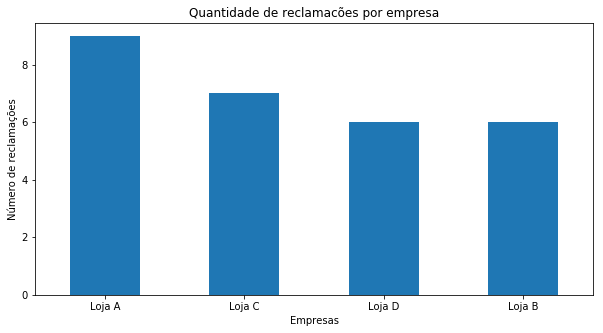

In [132]:
# Gráficos
import matplotlib.pyplot as plt

%matplotlib inline
# Quantidade de reclamcoes por empresa
empresa = reclamacoes.groupby("empresa")

plt.figure(figsize=(10,5))
empresa.size().sort_values(ascending=False).plot.bar()
plt.title("Quantidade de reclamacões por empresa")
plt.xticks(rotation=0)
plt.xlabel("Empresas")
plt.ylabel("Número de reclamações")
plt.show()

### 3.2 Cidade e Estado

#### Cidades

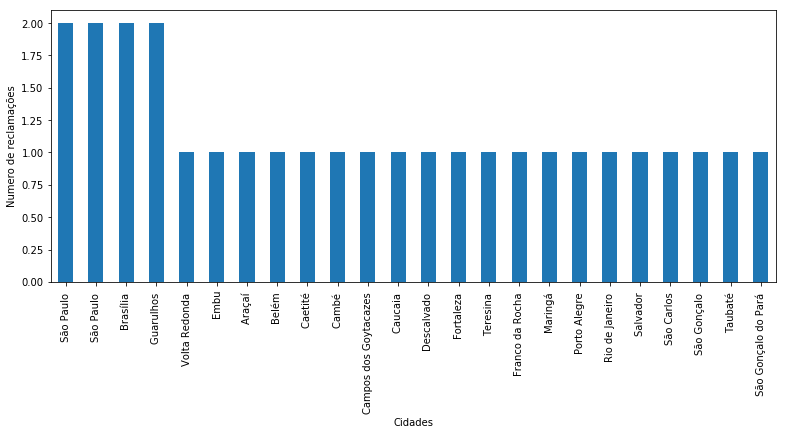

In [133]:
# Vendo quando locais recebem vem as reclamações
cidades = reclamacoes.groupby("cidade")

plt.figure(figsize=(13,5))
cidades.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Cidades")
plt.ylabel("Numero de reclamações")
plt.show()

#### Estados

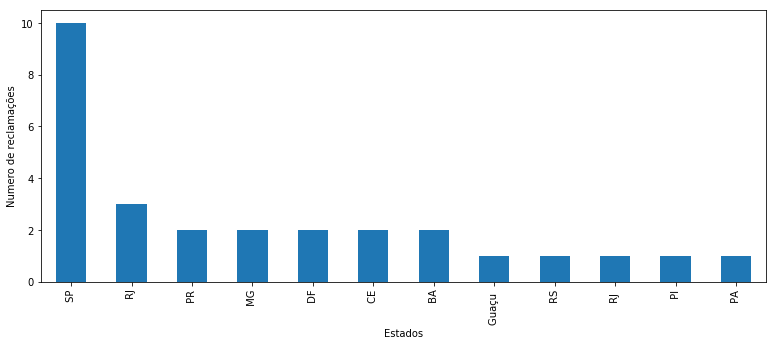

In [134]:
# Vendo quando locais recebem vem as reclamações
estados = reclamacoes.groupby("estado")

plt.figure(figsize=(13,5))
estados.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Estados")
plt.ylabel("Numero de reclamações")
plt.show()

### 3.3 Frequencia de palavras de todas as reclamações 

In [0]:
# NLTK
from nltk.probability import FreqDist

#função para ver as palavras mais frequente de todas as reclamações 

def freq_Words(text, number,titulo):
    words = word_tokenize(text)
    fdist = FreqDist(word for word in words)
    XY = fdist.items()
    XY = sorted(XY, key=lambda pair: pair[1], reverse=True)
    limit = number
    X = [x for (x,y) in XY[:limit]]
    Y = [y for (x,y) in XY[:limit]]
    nX = range(len(X))
    plt.figure(figsize=(13,5))
    plt.title("Tokens mais frequentes das {}".format(titulo))
    plt.plot(nX, Y, label='contagens dos tokens', color = "red")
    plt.xticks(nX, X, rotation='vertical')
    plt.xticks(rotation='60')
    plt.xlabel('Tokens')
    plt.ylabel('Contagens')
    plt.grid()
    plt.legend(loc='upper right', fontsize='small')
    #plt.tight_layout()
    plt.show()
    return fdist

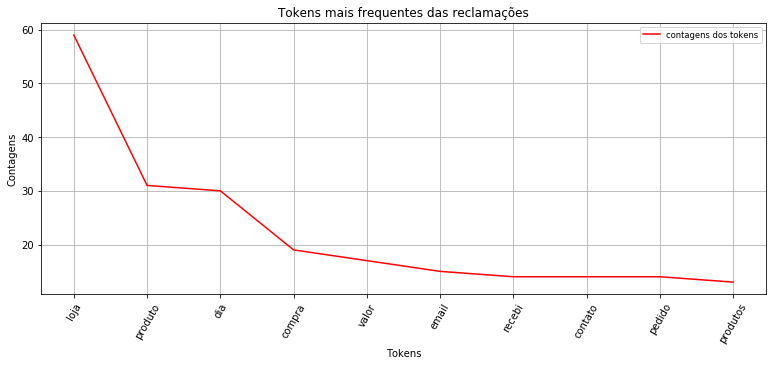

In [137]:
#juntando todas as mensagens em um unico texto
lista_reclamacao = ' '.join(reclamacoes.corpo_reclamacao_semStopWords.tolist())
frequencia = freq_Words(lista_reclamacao,10,"reclamações")

### 3.4 Frequencia de palavras de todas as tags 

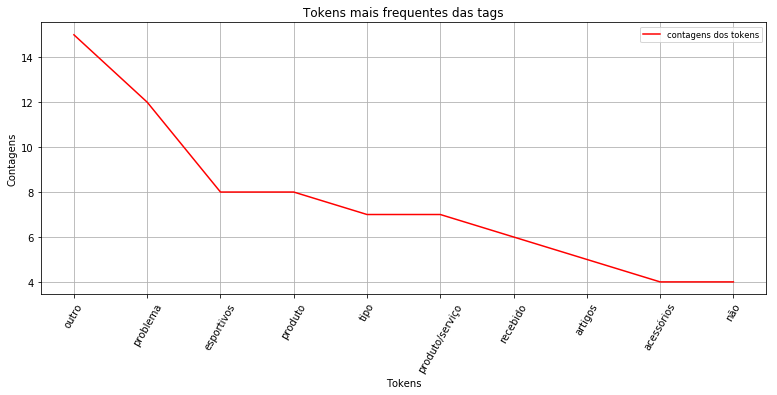

In [138]:
lista_tags = ' '.join(reclamacoes.Tags_semStopWords.tolist())
frequencia = freq_Words(lista_tags,10,"tags")

### 3.5 Frequencia de Respostas 

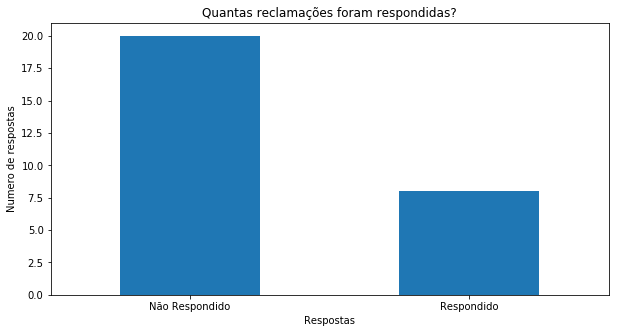

In [139]:
reclamacoes.teve_resposta = reclamacoes.teve_resposta.replace(0,"Não Respondido")
reclamacoes.teve_resposta = reclamacoes.teve_resposta.replace(1,"Respondido")      

respostas = reclamacoes.groupby("teve_resposta")
plt.figure(figsize=(10,5))
respostas.size().sort_values(ascending=False).plot.bar()
plt.title("Quantas reclamações foram respondidas?")
plt.xticks(rotation=0)
plt.xlabel("Respostas")
plt.ylabel("Numero de respostas")
plt.show()

## 4. Nuvem de palavras 

In [140]:
#Juntando todos os textos 

# Textos com StopWords
todas_reclamacoes = " ".join(review for review in reclamacoes.corpo_reclamacao_lower)

# Texto sem StopWords
todas_reclamacoes_semStopWords = " ".join(review for review in reclamacoes.corpo_reclamacao_semStopWords)

print ("Temos {} palavras juntando todas as reclamações.".format(len(todas_reclamacoes_semStopWords)))

Temos 14354 palavras juntando todas as reclamações.


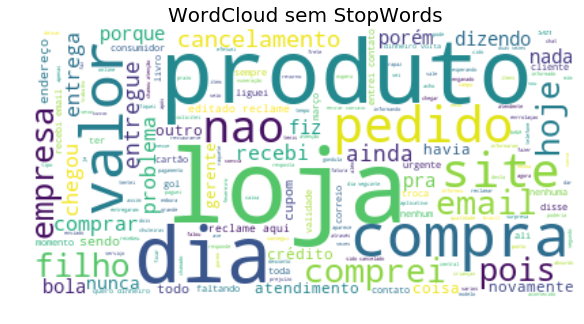

In [141]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

# World Cloud
# Exemplo: World cloud de todas reclamações sem stopwords

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white").generate(todas_reclamacoes_semStopWords)

# Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud sem StopWords', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

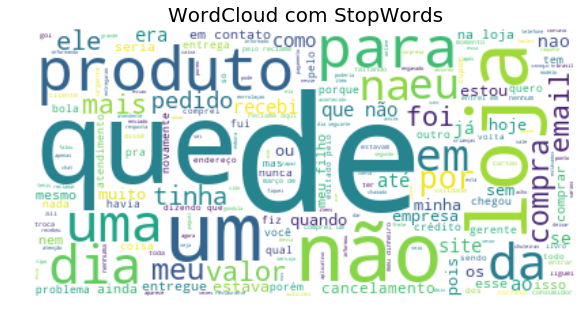

In [142]:
# World Cloud
# Exemplo: World cloud de todos os textos

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white").generate(todas_reclamacoes)

#Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud com StopWords', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Reparem na diferença na visualização. 

Na segunda, o resultado é muito menos util para um tomador de decisão que o primeiro.

Por exemplo, "problema", "pedido", "gerente", podem ser palavras a levantar um alerta dentor da empresa.

In [157]:
empresa = reclamacoes.loc[reclamacoes['empresa'] == 'Loja A']



,empresa,data_reclamacao,local,titulo_reclamacao,corpo_reclamacao,tags,teve_resposta,data,hora,estado,cidade,corpo_reclamacao_lower,corpo_reclamacao_tokens,corpo_reclamacao_semStopWords,Tags_semStopWords
0,Loja A,23/03/19 às 18h33,Guarulhos - SP,Mau Atendimento,Nunca mais compro nessa loja pelo fato de que ...,Calçados Esportivos,Não Respondido,2019-03-23,18h33,SP,Guarulhos,nunca mais compro nessa loja pelo fato de que ...,Nunca mais compro nessa loja pelo fato de que ...,nunca compro nessa loja fato pior atendimento ...,calçados esportivos
1,Loja A,23/03/19 às 18h20,Taubaté - SP,Produtos misturado na gondula e divergência na...,"Eu a LOJA comprar uma luva de musculação, na q...","Divergência de valores, Acessórios para Muscul...",Não Respondido,2019-03-23,18h20,SP,Taubaté,"eu a loja comprar uma luva de musculação, na q...","Eu a LOJA comprar uma luva de musculação, na q...",loja comprar luva musculação gondula descrito ...,divergência valores acessórios musculação arti...
2,Loja A,23/03/19 às 11h07,Franco da Rocha - SP,Informaçao errada do vendedor.,Estive na LOJA da Marginal Tiete no dia 15 de ...,"Produto errado, Raquetes e Tacos, Artigos Espo...",Não Respondido,2019-03-23,11h07,SP,Franco da Rocha,estive na loja da marginal tiete no dia 15 de ...,Estive na LOJA da Marginal Tiete no dia 15 de ...,loja marginal tiete dia 15 março 2019 procura ...,produto errado raquetes tacos artigos esportivos
3,Loja A,23/03/19 às 10h57,Teresina - PI,Paguei por um produto fora do estoque,Comprei 3 produtos no dia 13.03 e recebi email...,Acessórios de Vestuário,Respondido,2019-03-23,10h57,PI,Teresina,comprei 3 produtos no dia 13.03 e recebi email...,Comprei 3 produtos no dia 13.03 e recebi email...,comprei 3 produtos dia 13.03 recebi email conf...,acessórios vestuário
4,Loja A,22/03/19 às 19h49,São Gonçalo do Pará - MG,entregaram meu pedido a outra pessoa falando q...,comprei um tenis esportivo e ao receber o avis...,Problemas na finalização da compra Tênis Calça...,Não Respondido,2019-03-22,19h49,MG,São Gonçalo do Pará,comprei um tenis esportivo e ao receber o avis...,comprei um tenis esportivo e ao receber o avis...,comprei tenis esportivo receber aviso pedido c...,problemas finalização compra tênis calçados es...
5,Loja A,27/09/16 às 17h46,Cambé - PR,Troca enviada com numeração trocada,"Enviei para troca um par de Tênis, solicitando...","Tamanhos diferentes, Tênis Calçados Esportivos",Respondido,2016-09-27,17h46,PR,Cambé,"enviei para troca um par de tênis, solicitando...","Enviei para troca um par de Tênis, solicitando...",enviei troca par tênis solicitando enviado num...,tamanhos diferentes tênis calçados esportivos
6,Loja A,22/03/19 às 14h32,Brasília - DF,Atraso na entrega,"Efetuei uma compra em 09/03, com entrega previ...",Artigos Esportivos,Respondido,2019-03-22,14h32,DF,Brasília,"efetuei uma compra em 09/03, com entrega previ...","Efetuei uma compra em 09/03, com entrega previ...",efetuei compra 09/03 entrega prevista 18/03 re...,artigos esportivos
7,Loja A,20/03/19 às 18h32,São Carlos - SP,"Enganaram que foi entregue, porém nunca recebi !","Fiz um pedido, pagamento aprovado e debitado, ...",Artigos Esportivos,Respondido,2019-03-20,18h32,SP,São Carlos,"fiz um pedido, pagamento aprovado e debitado, ...","Fiz um pedido, pagamento aprovado e debitado, ...",fiz pedido pagamento aprovado debitado chegar ...,artigos esportivos
8,Loja A,19/03/19 às 08h44,Descalvado - SP,Troca demorada e ainda por cima produto postad...,Fiz meu pedido dia 26 de janeiro de 2019 de um...,"Outro problema, Outro Tipo de produto/Serviço,...",Respondido,2019-03-19,08h44,SP,Descalvado,fiz meu pedido dia 26 de janeiro de 2019 de um...,Fiz meu pedido dia 26 de janeiro de 2019 de um...,fiz pedido dia 26 janeiro 2019 calça trilha at...,outro problema outro tipo produto/serviço arti...


In [0]:
todas_reclamacoes_semStopWords_lojaa = " ".join(review for review in reclamacoes.loc[reclamacoes['empresa'] == 'Loja A'].corpo_reclamacao_semStopWords)


In [159]:
todas_reclamacoes_semStopWords_lojaa

"nunca compro nessa loja fato pior atendimento toda vida 23-03-2019. experimentando algumas chuteiras loja marginal tiete filho 13 anos encontrou bola futebol ali chão começou brincar várias crianças nessa loja brincam bolas acessórios saindo filho chutou bola próximo uns gols expostos ali setor funcionário chamou atenção frente todos ali entendi motivo questionei filho acontecido disse nisso funcionário veio falar falado pro filho pra chutar bola ali naquele espaço sendo filho rolado bola pra canto pois indo embora nisso esposa questionou chamando atenção filho chamar atenção todas crianças brincando ali ai pra surpresa disse filho chutado bola gol quebrado gol fiquei indignado entrada loja pedir chamassem gerente indignado ainda fiquei aparece rapaz la setor chuteiras junto rapaz chamou atenção filho dizendo gerente sei gerente loja poderia ser responsável setor chuteiras gerente loja porem disse gerente dizendo outro rapaz chamou atenção filho pois placa dizendo poderia chutar bola 

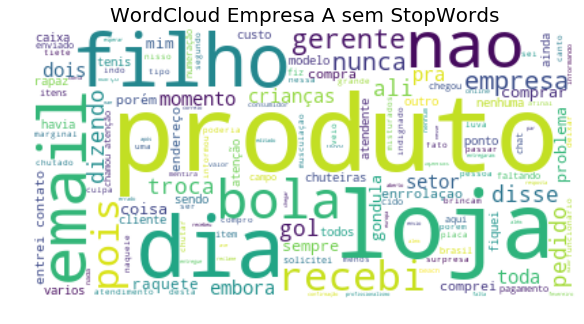

In [161]:
# Exercicios: World cloud de uma unica empresa

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud_empresa_A = WordCloud(background_color="white").generate(todas_reclamacoes_semStopWords_lojaa)

# Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud Empresa A sem StopWords', fontsize=20)
plt.imshow(wordcloud_empresa_A, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
todas_reclamacoes_comStopWords_lojaa = " ".join(review for review in reclamacoes.loc[reclamacoes['empresa'] == 'Loja A'].corpo_reclamacao_lower)


In [170]:
todas_reclamacoes_comStopWords_lojaa

'nunca mais compro nessa loja pelo fato de que tive o pior atendimento de toda minha vida 23-03-2019.\nestávamos experimentando algumas chuteiras na loja da marginal tiete, e meu filho (13 anos)encontrou uma bola de futebol ali no chão, e começou a brincar, várias crianças nessa loja brincam com bolas e acessórios, quando estávamos saindo, meu filho chutou a bola próximo a uns gols que estavam expostos ali no setor, e um funcionário chamou a atenção dele na frente de todos ali, não entendi o motivo, e questionei para meu filho o que tinha acontecido e ele me disse, e nisso o mesmo funcionário veio me falar que tinha falado pro meu filho pra ele não chutar a bola ali naquele espaço, sendo que o meu filho só tinha rolado a bola pra aquele canto pois estávamos indo embora, nisso minha esposa questionou se ele estava chamando a atenção do meu filho teria que chamar a atenção de todas as crianças que estavam brincando ali, ai pra minha surpresa ele disse que meu filho tinha chutado a bola n

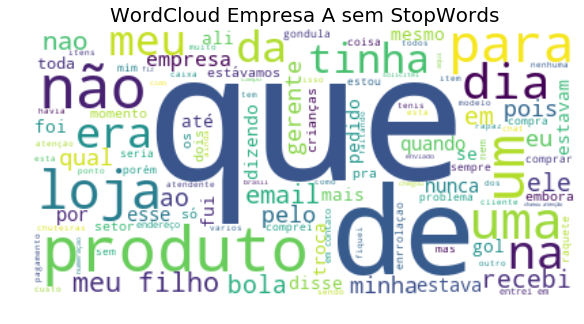

In [171]:
# Exercicios: World cloud de uma unica empresa

# Gerando a wordcloud
plt.figure(figsize=(10,5))
wordcloud_empresa_A = WordCloud(background_color="white").generate(todas_reclamacoes_comStopWords_lojaa)

# Mostrando nuvem de palavras com o matplotlib 
plt.title('WordCloud Empresa A sem StopWords', fontsize=20)
plt.imshow(wordcloud_empresa_A, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4.1 Nuvem de palavras com Imagem

In [175]:
# Selecionar a imagem que será utilizada como template
# OBS: A imagem precisa estar na mesma pasta que o notebook!

# Para executar na sua maquina
#py_mask = np.array(Image.open("pyladies.jpg")) 

# Para executar no Google Colab
uploaded = files.upload()
py_mask = np.array(Image.open(io.BytesIO(uploaded['pyladies.jpg'])))

# Cria a WordCloud passando a imagem selecionada acima como mascara
wc = WordCloud(background_color="white", max_words=10000, mask=py_mask,,margin=1)

wc.generate(todas_reclamacoes_semStopWords)

# Salva a imagem na sua maquina :)
wc.to_file("py.png")

plt.figure(figsize=[20,10])

image_colors = ImageColorGenerator(py_mask)
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear' )
plt.axis("off")


SyntaxError: ignored

# Um pouco de Deep Learning!

Vamos agora entrar no mundo do Deep Learning!

Par isso vamos utilizar o Spacy, uma poderosa bilioteca de Processamento de Linguagem Natural e é focada em "entender" grandes quantidades de texto.

Para instalar descomente a celula abaixo:

<b>ATENÇÃO:</b> Para instalar o Spacy na sua maquina pessoal é necessario ter o Microsoft Visual C++ 14.0 (visual studio) instalado na maquina. No Colab ele já vem pré-instalado :)

In [176]:
# Se já não tiver instalado o spacy...

!pip install spacy
# !python -m spacy download en
!python -m spacy download pt
!python -m spacy download pt_core_news_sm

     |████████████████████████████████| 38.7MB 46.9MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-smheyy8k/wheels/0b/f1/54/a8f759b41cf39d2a33d6da84cd90b8e2fefea549963396bbd2
Successfully built pt-core-news-sm

    Linking successful
    /usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/pt

    You can now load the model via spacy.load('pt')


    Linking successful
    /usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/pt_core_news_sm

    You can now load the model via spacy.load('pt_core_news_sm')



## 1. Primeiros passos com o Spacy

In [177]:
# Vamos usar o modelo pré-pronto que acabamos de baixar
import spacy

nlp = spacy.load('pt_core_news_sm') # Importando o modelo pré treinado de Deep Learning do Spacy em Português!

# Passando uma frase para o spacy
doc = nlp(u'Eai! Já ta sabendo tudo sobre NLP? A Camila conhece também, vou pedir pra ela me dar umas aulas')
# Obs: Repare no unicode na string...você deve usa-lo para que funcione corretamente.

# Tambem podemos Tokenizar o texto pelo Sapcy hehe
for token in doc:
    print(token.text)

Eai
!
Já
ta
sabendo
tudo
sobre
NLP
?
A
Camila
conhece
também
,
vou
pedir
pra
ela
me
dar
umas
aulas


## 2. Identificação de Entidades

A identificação de Entidade (em inglês Named Entity Recognition - NER) é a identificação de objetos/itens/coisas do mundo real, por exemplo, uma pessoa, um produto, um pais ou estado.

Com o Spacy é possivel se treinar seu proprio algoritmo de NER.

In [178]:
# Entidades

doc = nlp(u"Apesar da Maria morar em São Paulo, ela me disse que seu sonho era morar em Nova York")

for ent in doc.ents:
    print('Texto: {}'.format(ent.text))
    print('Inicio: {}'.format(ent.start_char))
    print('Fim: {}'.format(ent.end_char))
    print('Entidade: {}'.format(ent.label_))
    print('----'*5)

Texto: Maria
Inicio: 10
Fim: 15
Entidade: PER
--------------------
Texto: São Paulo
Inicio: 25
Fim: 34
Entidade: LOC
--------------------
Texto: Nova York
Inicio: 76
Fim: 85
Entidade: LOC
--------------------


Lista com os tipos de Entidade suportados/Identificados pelo Spacy: https://spacy.io/api/annotation#named-entities

In [179]:
# Visualizando de uma forma mais bonita!

from spacy import displacy
from IPython.core.display import display, HTML

html = displacy.render(doc, style="ent")
display(HTML(html))

In [0]:
reclamacoes

In [0]:
# Sua vez!

# Exercicios: Aplique NER nas reclamações de uma empresa que você queira, quais entidades foram as mais retornadas?

doc = nlp(reclamacoes['corpo_reclamacao'].iloc[0])


'Nunca mais compro nessa loja pelo fato de que tive o pior atendimento de toda minha vida 23-03-2019.\nEstávamos experimentando algumas chuteiras na loja da Marginal Tiete, e meu filho (13 anos)encontrou uma bola de futebol ali no chão, e começou a brincar, várias crianças nessa loja brincam com bolas e acessórios, quando estávamos saindo, meu filho chutou a bola próximo a uns gols que estavam expostos ali no setor, e um funcionário chamou a atenção dele na frente de todos ali, não entendi o motivo, e questionei para meu filho o que tinha acontecido e ele me disse, e nisso o mesmo funcionário veio me falar que tinha falado pro meu filho pra ele não chutar a bola ali naquele espaço, sendo que o meu filho só tinha rolado a bola pra aquele canto pois estávamos indo embora, nisso minha esposa questionou se ele estava chamando a atenção do meu filho teria que chamar a atenção de todas as crianças que estavam brincando ali, ai pra minha surpresa ele disse que meu filho tinha chutado a bola n

In [184]:
for token in doc:
    print(token.text)

nunca
mais
compro
n
essa
loja
pelo
fato
de
que
tive
o
pior
atendimento
de
toda
minha
vida
23
-
03
-
2019
.


estávamos
experimentando
algumas
chuteiras
na
loja
da
marginal
tiete
,
e
meu
filho
(
13
anos)encontrou
uma
bola
de
futebol
ali
no
chão
,
e
começou
a
brincar
,
várias
crianças
n
essa
loja
brincam
com
bolas
e
acessórios
,
quando
estávamos
saindo
,
meu
filho
chutou
a
bola
próximo
a
uns
gols
que
estavam
expostos
ali
no
setor
,
e
um
funcionário
chamou
a
atenção
d
ele
na
frente
de
todos
ali
,
não
entendi
o
motivo
,
e
questionei
para
meu
filho
o
que
tinha
acontecido
e
ele
me
disse
,
e
n
isso
o
mesmo
funcionário
veio
me
falar
que
tinha
falado
pro
meu
filho
pra
ele
não
chutar
a
bola
ali
n
aquele
espaço
,
sendo
que
o
meu
filho
só
tinha
rolado
a
bola
pra
aquele
canto
pois
estávamos
indo
embora
,
n
isso
minha
esposa
questionou
se
ele
estava
chamando
a
atenção
do
meu
filho
teria
que
chamar
a
atenção
de
todas
as
crianças
que
estavam
brincando
ali
,
ai
pra
minha
surpresa
ele
disse
que
meu
filh

In [201]:
doc = nlp(u'Apesar da Felipe morar em São Paulo, estava comendo, ela me disse que seu sonho era morar em Nova York')

for ent in doc.ents:
    print('Texto: {}'.format(ent.text))
    print('Inicio: {}'.format(ent.start_char))
    print('Fim: {}'.format(ent.end_char))
    print('Entidade: {}'.format(ent.label_))
    print('----'*5)

Texto: Felipe
Inicio: 10
Fim: 16
Entidade: LOC
--------------------
Texto: São Paulo
Inicio: 26
Fim: 35
Entidade: LOC
--------------------
Texto: Nova York
Inicio: 93
Fim: 102
Entidade: LOC
--------------------


In [199]:
from spacy import displacy
from IPython.core.display import display, HTML

html = displacy.render(doc, style="ent")
display(HTML(html))

## 3. Part-of-speech tagging - POS Tagging

### Análise de classes gramaticais 

Depois de tokenizar o texto é possivel identificar a classe gramatical de cada palavra/token (por exemplo, substantivo ou verbo)

Essa tecnica é bastante usada na geração automatica de legendas ou até mesmo na tradução automatica, pois com ela podemos entender o contexto da frase e inferir qual a proxima palavra é mais propensa a ser a correta

In [200]:
doc = nlp(u'Apesar da Maria morar em São Paulo, ela me disse que seu sonho era morar em Nova York')

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apesar Apesar ADV ADV|@ADVL> advmod Xxxxx True False
da da ADP PRP|@A< mark xx True True
Maria Maria PROPN PROPN nsubj Xxxxx True False
morar morar VERB <mv>|V|INF|3S|@ICL-P< advcl xxxx True False
em em ADP PRP|@<ADVL case xx True True
São São PROPN PROPN obl Xxx True False
Paulo Paulo PROPN PROPN flat:name Xxxxx True False
, , PUNCT PU|@PU punct , False False
ela ele PRON PERS|F|3S|NOM|@SUBJ> nsubj xxx True True
me me PRON <refl>|PERS|M/F|1S|ACC|@ACC> iobj xx True True
disse dizer VERB <mv>|V|PS|3S|IND|@FS-STA ROOT xxxx True False
que que SCONJ KS|@SUB mark xxx True True
seu seu DET <poss>|DET|M|S|@>N det xxx True True
sonho sonhar NOUN <np-def>|N|M|S|@SUBJ> nsubj xxxx True False
era ser VERB <cjt>|<mv>|V|IMPF|3S|IND|@FS-STA cop xxx True True
morar morar VERB <mv>|V|INF|@ICL-<SC ccomp xxxx True False
em em ADP PRP|@<ADVL case xx True True
Nova Nova PROPN PROPN obl Xxxx True False
York York PROPN PROPN flat:name Xxxx True False


In [0]:
html = displacy.render(doc, style="dep")
display(HTML(html))

# Fim :)